#Data Cleaning

In [1]:
%pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-08-06 19:23:53--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  27.1MB/s    in 0.8s    

2025-08-06 19:23:54 (27.1 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1=pd.read_excel("Online Retail.xlsx")
print(df1.shape)
df1.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
empty_counts = df1.isna().sum()
print(empty_counts)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51502,540646,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-01-10 14:32:00,11.02,NaN,United Kingdom
151246,549548,21157,RED RETROSPOT WASHBAG,1,2011-04-10 11:35:00,2.10,13548.0,United Kingdom
453085,575477,22689,DOORMAT MERRY CHRISTMAS RED,1,2011-11-09 16:14:00,16.63,NaN,United Kingdom
23646,538208,20727,LUNCH BAG BLACK SKULL.,2,2010-12-10 11:39:00,1.65,14037.0,United Kingdom
142133,548554,21096,SET/6 FRUIT SALAD PAPER PLATES,192,2011-04-01 09:19:00,0.39,13694.0,United Kingdom
250162,C559008,22570,FELTCRAFT CUSHION RABBIT,-1,2011-07-05 12:44:00,3.75,15518.0,United Kingdom
512421,579512,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1,2011-11-29 16:47:00,5.79,NaN,United Kingdom
286313,562024,85086A,CANDY SPOT HEART DECORATION,2,2011-08-01 16:07:00,0.83,NaN,United Kingdom
197209,553890,22386,JUMBO BAG PINK POLKADOT,2,2011-05-19 16:32:00,4.13,NaN,United Kingdom
187749,553005,20972,PINK CREAM FELT CRAFT TRINKET BOX,1,2011-05-12 16:29:00,1.25,14651.0,United Kingdom


In [8]:
df1["CustomerID"] = df1["CustomerID"].fillna("Unknown")
df1.sample(10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
def to_int(idx):
  try:
    return int(idx)
  except:
    return idx

In [10]:
df1["CustomerID"]=df1["CustomerID"].apply(lambda idx: to_int(idx))
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
92820,544206,22946,WOODEN ADVENT CALENDAR CREAM,1,2011-02-17 10:33:00,33.29,Unknown,United Kingdom
65450,541695,21992,VINTAGE PAISLEY STATIONERY SET,11,2011-01-20 18:01:00,2.46,Unknown,United Kingdom
528256,580729,22212,FOUR HOOK WHITE LOVEBIRDS,2,2011-12-05 17:24:00,4.13,Unknown,United Kingdom
248284,558810,21078,SET/20 STRAWBERRY PAPER NAPKINS,5,2011-07-04 11:11:00,2.46,Unknown,United Kingdom
402729,571508,22429,ENAMEL MEASURING JUG CREAM,1,2011-10-17 15:27:00,8.29,Unknown,United Kingdom
412517,572291,22191,IVORY DINER WALL CLOCK,1,2011-10-23 12:46:00,8.50,16931,United Kingdom
126060,547063,84991,60 TEATIME FAIRY CAKE CASES,24,2011-03-20 13:33:00,0.55,14769,United Kingdom
237197,557805,23202,JUMBO BAG VINTAGE LEAF,10,2011-06-23 10:27:00,2.08,17651,United Kingdom
158131,550277,20725,LUNCH BAG RED RETROSPOT,10,2011-04-15 12:48:00,1.65,12639,Sweden
431088,573585,23404,HOME SWEET HOME BLACKBOARD,2,2011-10-31 14:41:00,10.79,Unknown,United Kingdom


In [11]:
import numpy as np

def desc(idx):
  try:
    return idx.mode().iloc[0]
  except:
    return np.nan

In [12]:
desc_map=df1.groupby("StockCode")["Description"].agg(lambda idx: desc(idx))

In [13]:
df1["Correct Description"]=df1["StockCode"].map(desc_map)
df1.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Correct Description
299633,563137,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-08-12 11:22:00,1.25,14534,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR
338779,566566,22131,FOOD CONTAINER SET 3 LOVE HEART,1,2011-09-13 12:32:00,4.13,14096,United Kingdom,FOOD CONTAINER SET 3 LOVE HEART
255326,559338,21539,RED RETROSPOT BUTTER DISH,1,2011-07-07 16:30:00,9.96,Unknown,United Kingdom,RED RETROSPOT BUTTER DISH
159684,550352,20773,BLUE PAISLEY NOTEBOOK,2,2011-04-18 10:21:00,1.65,16719,United Kingdom,BLUE PAISLEY NOTEBOOK
508939,579284,21500,PINK POLKADOT WRAP,100,2011-11-29 10:52:00,0.36,15061,United Kingdom,PINK POLKADOT WRAP
441131,574561,22163,HEART STRING MEMO HOLDER HANGING,2,2011-11-04 15:52:00,1.63,Unknown,United Kingdom,HEART STRING MEMO HOLDER HANGING
258198,559557,84877D,BLUE ROUND COMPACT MIRROR,24,2011-07-11 10:33:00,1.25,17444,Canada,BLUE ROUND COMPACT MIRROR
136239,547945,20750,RED RETROSPOT MINI CASES,2,2011-03-28 14:59:00,7.95,14851,United Kingdom,RED RETROSPOT MINI CASES
533712,581103,22689,NaN,4,2011-12-07 11:58:00,0.00,Unknown,United Kingdom,DOORMAT MERRY CHRISTMAS RED
396131,571055,21809,CHRISTMAS HANGING TREE WITH BELL,48,2011-10-13 14:08:00,0.39,14975,United Kingdom,CHRISTMAS HANGING TREE WITH BELL


In [14]:
df1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Correct Description,112


In [15]:
df1["Description"]=df1["Correct Description"]

In [16]:
df1.drop(columns=["Correct Description"], inplace=True)

In [17]:
df1.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113337,545945,21592,RETROSPOT CIGAR BOX MATCHES,1,2011-03-08 12:07:00,1.25,16710,United Kingdom
532239,580983,21981,PACK OF 12 WOODLAND TISSUES,6,2011-12-06 16:26:00,0.83,Unknown,United Kingdom
448840,575073,23497,CLASSIC CHROME BICYCLE BELL,9,2011-11-08 13:10:00,1.45,13975,United Kingdom
169111,551161,85099B,JUMBO BAG RED RETROSPOT,10,2011-04-26 15:26:00,2.08,18183,United Kingdom
183273,552655,22650,CERAMIC PIRATE CHEST MONEY BANK,4,2011-05-10 14:22:00,1.45,14587,United Kingdom
81244,543116,22698,PINK REGENCY TEACUP AND SAUCER,6,2011-02-03 13:29:00,2.95,17672,United Kingdom
64933,541683,22333,RETROSPOT PARTY BAG + STICKER SET,6,2011-01-20 15:01:00,1.65,14085,United Kingdom
292458,562553,22692,DOORMAT WELCOME TO OUR HOME,1,2011-08-05 16:34:00,15.79,Unknown,United Kingdom
428361,573425,23313,VINTAGE CHRISTMAS BUNTING,5,2011-10-31 10:05:00,4.95,16836,United Kingdom
63014,541518,22859,EASTER TIN BUNNY BOUQUET,24,2011-01-19 09:05:00,1.65,12451,Switzerland


In [18]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [19]:
df1[df1["Quantity"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [20]:
df1[df1["UnitPrice"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,Unknown,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,Unknown,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,Unknown,United Kingdom


In [25]:
df2=df1[(df1["Quantity"]>0) & (df1["UnitPrice"]>0)].copy()
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
186524,552867,22725,ALARM CLOCK BAKELIKE CHOCOLATE,4,2011-05-12 08:36:00,3.75,15513,United Kingdom
148324,549233,51014A,"FEATHER PEN,HOT PINK",96,2011-04-07 11:06:00,0.85,14912,Italy
359097,568174,23247,BISCUIT TIN 50'S CHRISTMAS,1,2011-09-25 13:23:00,2.89,16261,United Kingdom
224608,556537,21417,COCKLE SHELL DISH,12,2011-06-13 12:38:00,2.10,17725,United Kingdom
189811,553167,20728,LUNCH BAG CARS BLUE,15,2011-05-13 16:19:00,4.96,Unknown,United Kingdom
402883,571508,23640,SET 10 CARDS SCOTTIE DOG 17211,2,2011-10-17 15:27:00,2.49,Unknown,United Kingdom
88383,543802,84050,PINK HEART SHAPE EGG FRYING PAN,4,2011-02-13 12:03:00,1.65,13742,United Kingdom
306344,563748,21705,BAG 500g SWIRLY MARBLES,12,2011-08-19 10:06:00,1.65,16170,United Kingdom
482110,577409,22378,WALL TIDY RETROSPOT,5,2011-11-20 10:53:00,2.10,16779,United Kingdom
199080,554083,21866,UNION JACK FLAG LUGGAGE TAG,3,2011-05-22 11:51:00,1.25,18125,United Kingdom


In [26]:
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [27]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice
count,530104.000000,530104,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625
min,1.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000
50%,3.000000,2011-07-20 12:58:00,2.080000
75%,10.000000,2011-10-19 12:39:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,155.524124,NaN,35.915681


#Sales Analysis

In [28]:
df2["TotalSales"]=df2["UnitPrice"]*df2["Quantity"]
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
478253,577078,21899,GARAGE KEY FOB,3,2011-11-17 15:17:00,1.63,Unknown,United Kingdom,4.89
388305,570423,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,2011-10-10 13:38:00,3.75,14451,United Kingdom,7.50
520853,580305,84796A,PINK HAWAIIAN PICNIC HAMPER FOR 2,2,2011-12-02 14:26:00,12.75,12970,United Kingdom,25.50
424962,573295,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,2011-10-28 15:54:00,7.08,14440,United Kingdom,70.80
181641,552493,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,5,2011-05-09 16:21:00,2.08,Unknown,United Kingdom,10.40
267222,560291,21874,GIN AND TONIC MUG,1,2011-07-18 10:17:00,3.29,Unknown,United Kingdom,3.29
463923,576075,23309,SET OF 60 I LOVE LONDON CAKE CASES,6,2011-11-13 16:16:00,0.55,15861,United Kingdom,3.30
172924,551599,22089,PAPER BUNTING VINTAGE PAISLEY,6,2011-05-03 11:34:00,2.95,15696,United Kingdom,17.70
218754,556065,21636,MADRAS NOTEBOOK MEDIUM,12,2011-06-08 14:29:00,0.75,14829,United Kingdom,9.00
528581,580729,23353,6 GIFT TAGS VINTAGE CHRISTMAS,9,2011-12-05 17:24:00,1.63,Unknown,United Kingdom,14.67


In [29]:
df2["Month"]=df2["InvoiceDate"].dt.month
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
274970,560926,20997,ROSE DU SUD CUSHION COVER,3,2011-07-22 09:20:00,4.13,Unknown,United Kingdom,12.39,7
463195,576054,21985,PACK OF 12 HEARTS DESIGN TISSUES,1,2011-11-13 14:55:00,0.39,15787,United Kingdom,0.39,11
478866,577108,22514,CHILDS GARDEN SPADE BLUE,1,2011-11-17 17:34:00,2.10,15983,United Kingdom,2.10,11
418557,572732,85015,SET OF 12 VINTAGE POSTCARD SET,144,2011-10-25 15:21:00,0.65,18079,United Kingdom,93.60,10
422157,573066,23493,VINTAGE DOILY TRAVEL SEWING KIT,4,2011-10-27 13:53:00,1.95,16026,United Kingdom,7.80,10
417088,572613,22784,LANTERN CREAM GAZEBO,3,2011-10-25 11:28:00,4.95,15345,United Kingdom,14.85,10
322638,565233,22725,ALARM CLOCK BAKELIKE CHOCOLATE,1,2011-09-02 09:34:00,7.46,Unknown,United Kingdom,7.46,9
105519,545227,22395,PAPERWEIGHT VINTAGE PAISLEY,6,2011-03-01 09:35:00,2.55,12428,Finland,15.30,3
317264,564758,84828,JUNGLE POPSICLES ICE LOLLY MOULDS,1,2011-08-30 10:39:00,2.46,Unknown,United Kingdom,2.46,8
117281,546378,22220,CAKE STAND LOVEBIRD 2 TIER WHITE,2,2011-03-11 12:17:00,9.95,14329,United Kingdom,19.90,3


In [30]:
monthly_sales =df2.groupby("Month")["TotalSales"].sum()
monthly_sales

,TotalSales
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


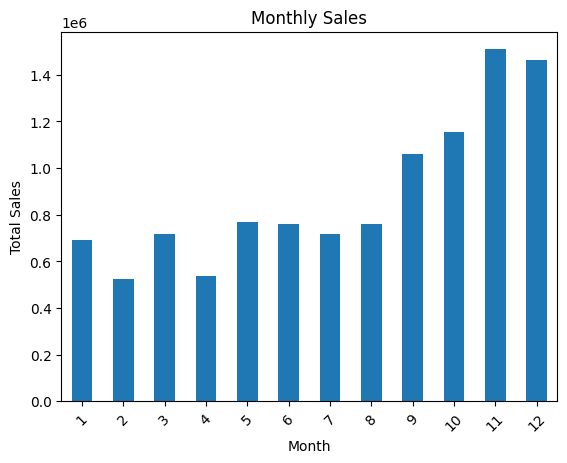

In [36]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind="bar")
# monthly_sales.plot()
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [39]:
country_sales=df2.groupby("Country")["TotalSales"].sum()
country_sales.sort_values(ascending=False, inplace=True)
country_sales

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


Country
United Kingdom    89.958016
Netherlands        2.845158
EIRE               2.825300
Germany            2.281211
France             2.090315
Name: TotalSales, dtype: float64


/tmp/ipython-input-3803254002.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=country_sales_percent[i]


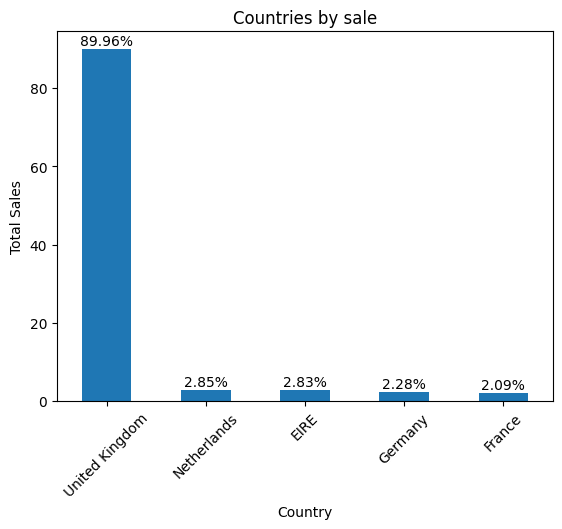

In [44]:
country_sales_top5=country_sales.head()
country_sales_percent=((country_sales_top5)/(country_sales_top5).sum())*100
print(country_sales_percent)
country_sales_percent.plot(kind="bar")

for i in range(len(country_sales_percent)):
  val=country_sales_percent[i]
  plt.text(i, val+1, f"{val:.2f}%",ha="center")


plt.title("Countries by sale")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()